In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv("customer_analysis.csv",sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


First, we need to find a column in which there are no NaN values. If there is a column where some values are present and it's specific to that column, in that case, we can fill the NaN values with the mean or median of that column. If the column is discrete, in my opinion, specific rows with NaN values should be deleted.

In [ ]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


In this case, the "Income" column has missing values denoted as NaN. "Income" is a continuous variable, so we have missing values in this column.

In [ ]:
df['Income'] = df['Income'].fillna((df['Income'].mean()))

we are interested in the number of unique variables in each column because if there is a column where all variables are the same, it does not provide any information to the machine learning model. It simply adds unnecessary dimensionality. Therefore, I want to remove all columns where there is only one unique variable.

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
df = df.drop(columns = ["Z_CostContact","Z_Revenue"],axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


To reduce the dimensionality of the dataset and mitigate the curse of dimensionality, we need to carefully consider each column.

In your case, it seems like you want to consolidate the information from the "KidHome" and "TeenHome" columns into a single column called "Kids." You can create this new column by combining the information from both columns. If a customer has children either in KidHome or TeenHome, you can assign a value like "Yes" to the "Kids" column. If a customer doesn't have children in either category, you can assign a value like "No."

By doing this, you effectively reduce the dimensionality of these two columns into one while preserving the essential information about whether a customer has children. This approach helps address the curse of dimensionality by simplifying the dataset without losing critical information.

Remember to perform similar evaluations and reductions for other columns in your dataset to achieve your goal of minimizing the number of dimensions.

In [ ]:
df["kids"] = df['Kidhome'] + df['Teenhome']

The next step in data preprocessing involves reducing the dimensionality of the Marital_status column in the dataset. In reality, our current detailed marital status categories do not provide much value for the specific task we are working on. Therefore, we can simplify this column to contain only two categories: "Single" and "In a Relationship." The "In a Relationship" category will encompass those who are currently married or living together.

This simplification will help reduce the number of dimensions in the dataset and make it more manageable for modeling while still capturing the essence of marital status information.

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df["Marital_Status"] = df["Marital_Status"].replace(["Married","Together"],"Relationship")
df["Marital_Status"]= df["Marital_Status"].replace(["Divorced","Widow","Alone","YOLO","Absurd"],"Single")
df["Marital_Status"].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

The next step will be to consolidate all expenses and also group the total number of clients who have participated in any company, whether at least once or not.


In [ ]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["TotalCMP"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df["TotalPurchases"] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Finally, let's remove the columns that are not needed.
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,kids,Spent,TotalCMP,TotalPurchases
0,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,1965,Graduation,Relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,1984,Graduation,Relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,1981,PhD,Relationship,58293.0,19-01-2014,94,0,1,422,0,19


The next step will involve transforming the dates into years. In reality, we do not need specific dates but rather the number of years. For example, we can convert the "Year_Birth" column into age groups by calculating the number of years since birth. Similarly, we can analyze how long each customer has been associated with the company by converting the "DT_customer" column into the total number of years.

This process will help simplify and categorize the data for analysis.

In [ ]:
df['Age'] = 2023 - df["Year_Birth"]
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['Today'] = '03-15-2023'
df['Today'] = pd.to_datetime(df.Today)
df['Days_Since_Enrolment'] = (df['Today'] - df['Dt_Customer']).dt.days
df

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,kids,Spent,TotalCMP,TotalPurchases,Age,Today,Days_Since_Enrolment
0,1957,Graduation,Single,58138.0,2012-04-09,58,0,0,1617,1,25,66,2023-03-15,3992
1,1954,Graduation,Single,46344.0,2014-08-03,38,0,2,27,0,6,69,2023-03-15,3146
2,1965,Graduation,Relationship,71613.0,2013-08-21,26,0,0,776,0,21,58,2023-03-15,3493
3,1984,Graduation,Relationship,26646.0,2014-10-02,26,0,1,53,0,8,39,2023-03-15,3086
4,1981,PhD,Relationship,58293.0,2014-01-19,94,0,1,422,0,19,42,2023-03-15,3342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,61223.0,2013-06-13,46,0,1,1341,0,18,56,2023-03-15,3562
2236,1946,PhD,Relationship,64014.0,2014-10-06,56,0,3,444,1,22,77,2023-03-15,3082
2237,1981,Graduation,Single,56981.0,2014-01-25,91,0,0,1241,1,19,42,2023-03-15,3336
2238,1956,Master,Relationship,69245.0,2014-01-24,8,0,1,843,0,23,67,2023-03-15,3337


In [ ]:
df=df.drop(columns=["Dt_Customer", "Today", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [ ]:
df

,Education,Marital_Status,Income,kids,Spent,TotalCMP,TotalPurchases,Age,Days_Since_Enrolment
0,Graduation,Single,58138.0,0,1617,1,25,66,3992
1,Graduation,Single,46344.0,2,27,0,6,69,3146
2,Graduation,Relationship,71613.0,0,776,0,21,58,3493
3,Graduation,Relationship,26646.0,1,53,0,8,39,3086
4,PhD,Relationship,58293.0,1,422,0,19,42,3342
...,...,...,...,...,...,...,...,...,...
2235,Graduation,Relationship,61223.0,1,1341,0,18,56,3562
2236,PhD,Relationship,64014.0,3,444,1,22,77,3082
2237,Graduation,Single,56981.0,0,1241,1,19,42,3336
2238,Master,Relationship,69245.0,1,843,0,23,67,3337


In [ ]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Similarly, we will simplify and group clients into two categories: "Graduated" and "Not Graduated." In other words, there will be a basic division between those who have completed their education and those who have not: "PostGraduate" and "UnderGraduate."

In [ ]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [ ]:
df

,Education,Marital_Status,Income,kids,Spent,TotalCMP,TotalPurchases,Age,Days_Since_Enrolment
0,PG,Single,58138.0,0,1617,1,25,66,3992
1,PG,Single,46344.0,2,27,0,6,69,3146
2,PG,Relationship,71613.0,0,776,0,21,58,3493
3,PG,Relationship,26646.0,1,53,0,8,39,3086
4,PG,Relationship,58293.0,1,422,0,19,42,3342
...,...,...,...,...,...,...,...,...,...
2235,PG,Relationship,61223.0,1,1341,0,18,56,3562
2236,PG,Relationship,64014.0,3,444,1,22,77,3082
2237,PG,Single,56981.0,0,1241,1,19,42,3336
2238,PG,Relationship,69245.0,1,843,0,23,67,3337


Next, the task is to find the correlation between columns. Correlation measures the relationship between two variables. The correlation value ranges from -1 to 1. A value closer to -1 indicates a strong negative correlation, while a value closer to 1 indicates a strong positive correlation. For example, if one variable increases as the other decreases, they have a strong negative correlation.

If the correlation is close to 0, it means there is no significant linear relationship between the two variables. In your case, we are calculating correlation between the Age and Income columns.

Let's say the correlation is calculated to be close to -1. This means that these two variables are strongly negatively correlated, which implies that as one variable increases, the other decreases. On the other hand, if the correlation is close to 1, it means a strong positive correlation, indicating that the two variables tend to increase together.

In summary, correlation helps us understand how two variables relate to each other. When correlation is greater than 0.75 or less than -0.75, it means these two variables are strongly correlated and we should be cautious about multicollinearity. When correlation is close to 0, the variables are not significantly related.

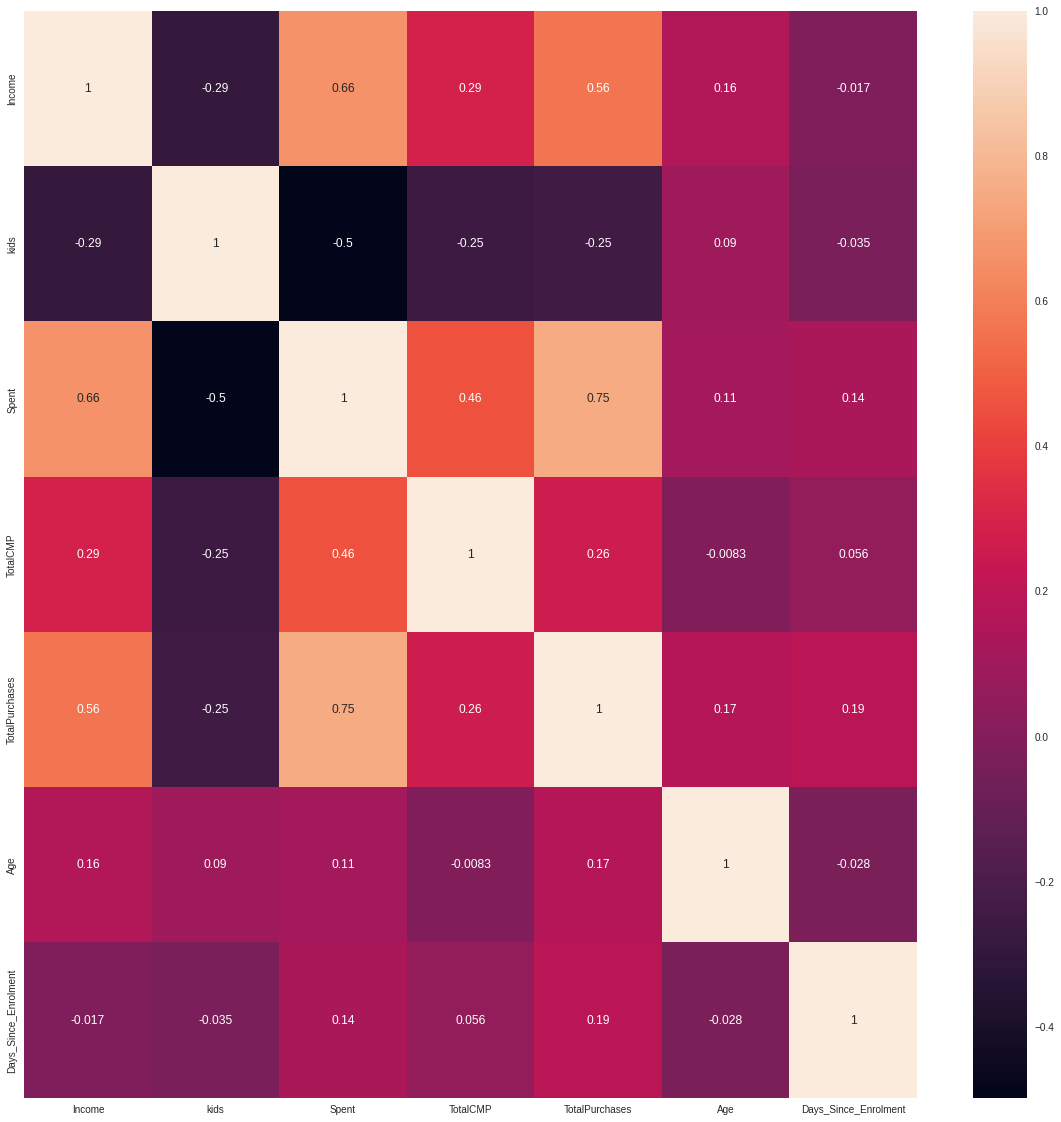

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

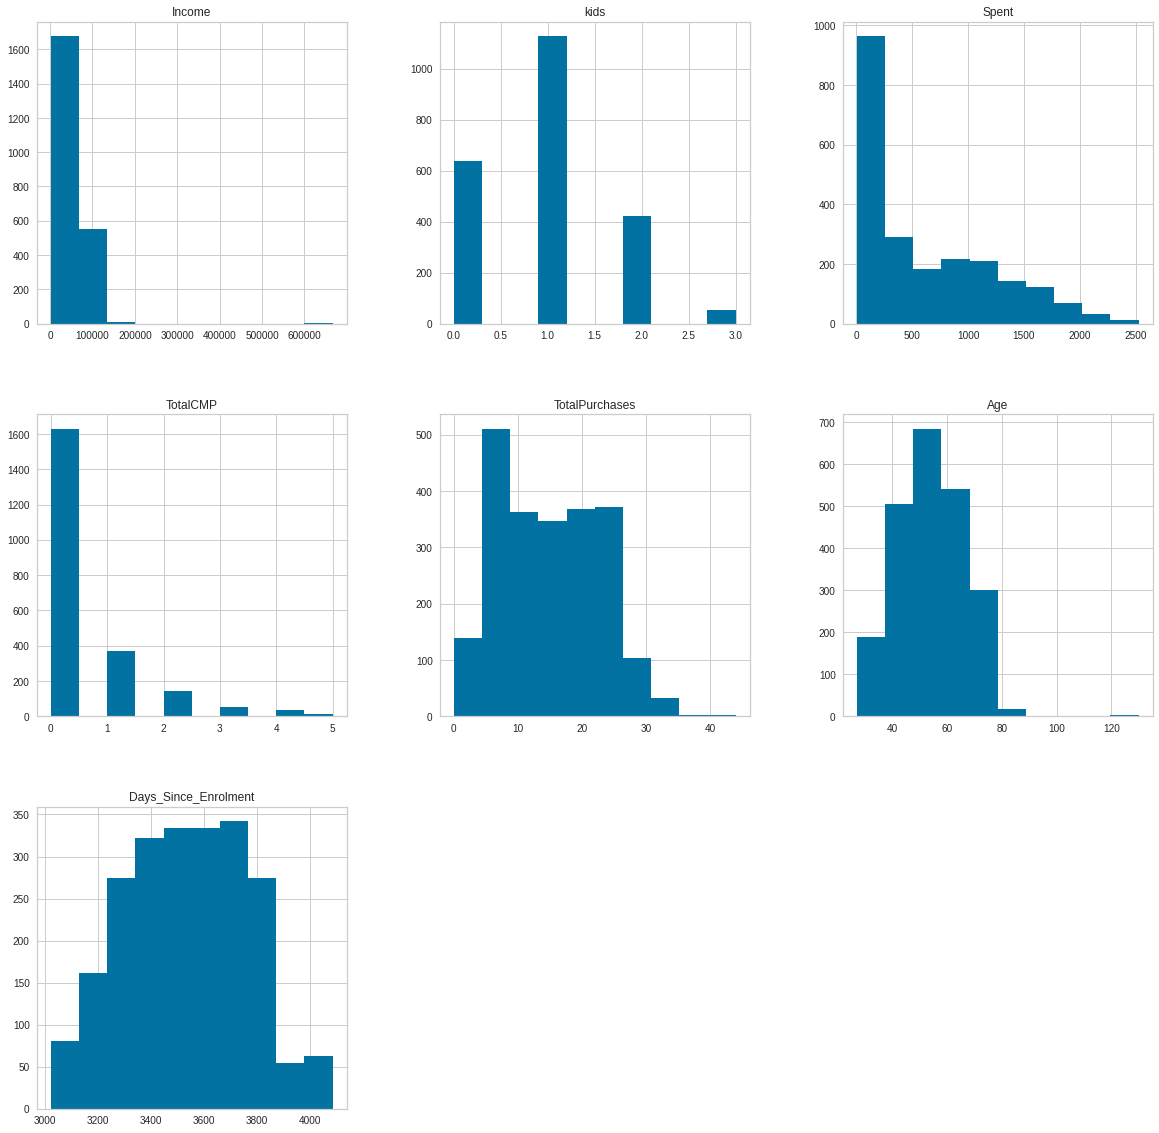

In [ ]:
df.hist(figsize=(20,20))
plt.show()

Here, the term "outliers" refers to Age and Income columns. To confirm this, let's create a more accurate visualization.

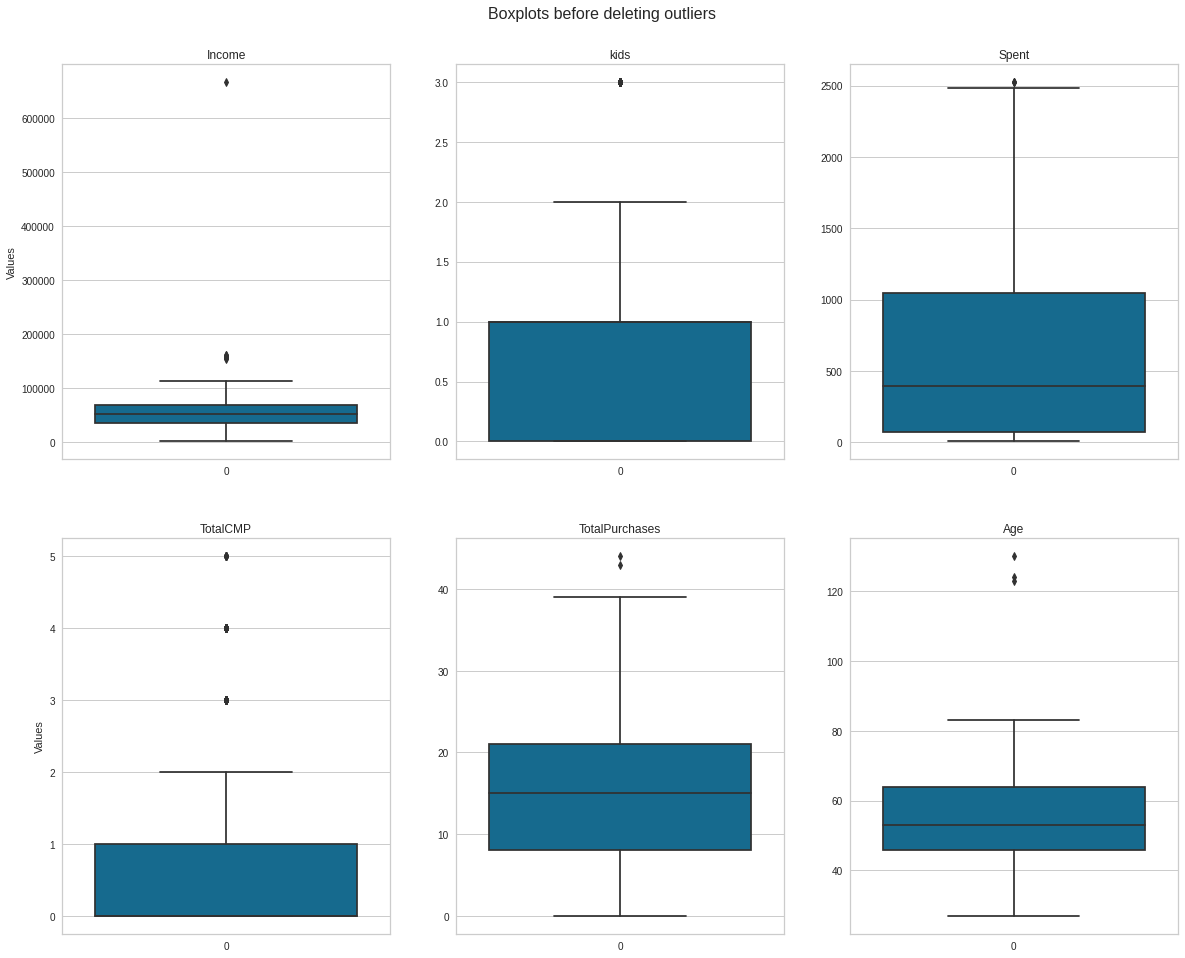

In [ ]:
numeric_columns = ["Income","kids","Spent","TotalCMP","TotalPurchases","Age"]

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots before deleting outliers')

For instance, in the chart, two outliers stand out in two columns: age below 120 and income above 600,000. However, in reality, the age rarely exceeds 90 years, and the income also doesn't go beyond 200,000. It appears that the outliers in other columns do not correlate with the previous visualization.

In [ ]:
#წავშალოთ აუთლაიერები დატასეტიდან
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]

In [ ]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.3, template = "gridon")
fig.show ()

The majority of clients have different types of relationships

In [ ]:
fig =  px.pie (df, names = "Education", hole = 0.3, template = "gridon")
fig.show ()

The absolute majority of clients have completed their education.

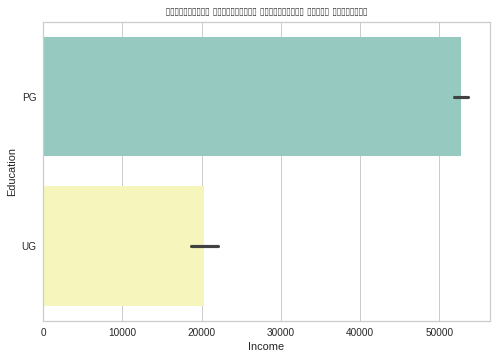

In [ ]:
sns.barplot(data=df, x="Income", y="Education",palette= "Set3")
plt.title('კლიენტების შემოსავალი განათლების დონის მიხედვით');

The clients with the highest income are usually those who have completed their education at the highest level.

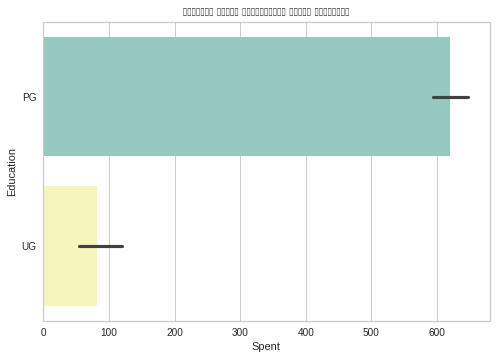

In [ ]:
sns.barplot(data=df, x="Spent", y="Education",palette= "Set3")
plt.title('მთლიანი ხარჯი განათლების დონის მიხედვით');

The company's main revenue comes from course-completed clients.

I will perform clustering using manual grid search. This means I will train multiple clustering models such as KMeans, MeanShift, and others with various values of K to find the optimal number of clusters. To determine the optimal K, I will utilize the Elbow Method. The Elbow Method calculates the sum of squared distances between data points and their assigned cluster centers for different K values and helps identify a point where the rate of decrease in this sum starts to slow down, resembling an "elbow" shape in the plot. Additionally, I will use PCA (Principal Component Analysis) for dimensionality reduction in the clustering process.

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("დისკრეტული ცვლადები:", object_cols)

დისკრეტული ცვლადები: ['Education', 'Marital_Status']


In [ ]:
ds=df.copy()
LE = LabelEncoder()
for i in object_cols:
    ds[i] = ds[[i]].apply(LE.fit_transform)



Standardization is applied to features in this case to ensure that all features have the same scale (mean of 0 and standard deviation of 1), making them directly comparable. It's important for distance-based algorithms, helps optimization algorithms converge faster, and aids in model interpretability. Standardization is a common preprocessing step in machine learning for numerical features.

In [ ]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")
scaled_ds.head()

All features are now scaled


,Education,Marital_Status,Income,kids,Spent,TotalCMP,TotalPurchases,Age,Days_Since_Enrolment
0,-0.157315,1.347635,0.288513,-1.264308,1.680176,0.620456,1.319340,1.016868,1.975467
1,-0.157315,1.347635,-0.262438,1.395139,-0.962202,-0.501987,-1.155857,1.273264,-1.667017
2,-0.157315,-0.742041,0.917992,-1.264308,0.282541,-0.501987,0.798246,0.333146,-0.172996
3,-0.157315,-0.742041,-1.182621,0.065416,-0.918994,-0.501987,-0.895310,-1.290693,-1.925349
4,-0.157315,-0.742041,0.295754,0.065416,-0.305762,-0.501987,0.537699,-1.034298,-0.823131


In [ ]:
pca = PCA(n_components = 4)
pca.fit(scaled_ds)

df_pca = pca.transform(scaled_ds)
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3',"D4"])
df_pca

,D1,D2,D3,D4
0,2.593294,0.612830,-0.927209,1.995029
1,-1.735364,-1.702652,1.659765,1.023211
2,1.253494,-0.201902,-0.187998,-0.889031
3,-1.991139,0.167794,1.341399,-1.686327
4,-0.119267,-0.046163,0.262756,-1.214507
...,...,...,...,...
2231,0.929368,-0.421176,-0.632007,-0.581335
2232,-0.006080,-3.081387,0.331360,-0.367716
2233,1.388214,1.171122,1.716491,0.283419
2234,1.002297,-1.410055,-0.106550,-0.690393


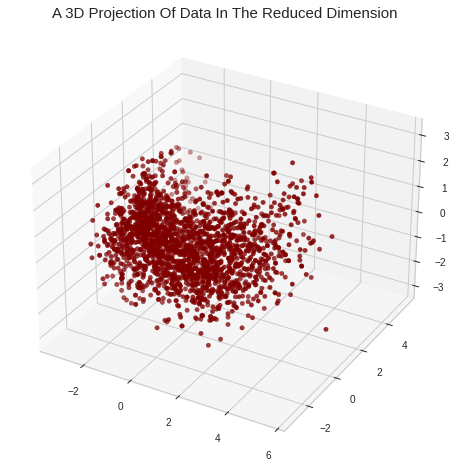

In [ ]:
x =df_pca["D1"]
y =df_pca["D2"]
z =df_pca["D3"]
t=df_pca["D4"]

fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y,z, c="maroon", marker="o" )
a.set_title("A 3D Projection Of Data In The Reduced Dimension", size=15)
plt.show()

Elbow Method to determine the number of clusters to be formed:


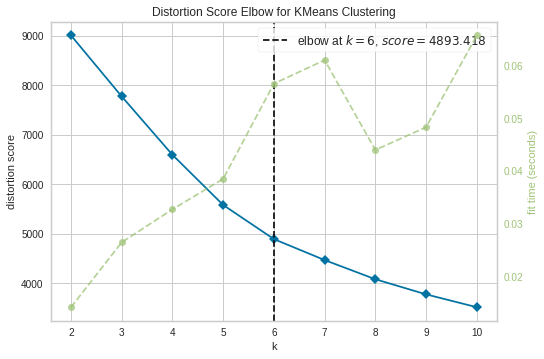

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In this case, the optimal number of clusters is exactly 6. However, I still chose to use 3 clusters because using 6 clusters would result in excessive overlap between clusters

K-means is a machine learning algorithm used for grouping similar data points into K clusters. It starts with K initial cluster centers, assigns data points to the nearest cluster, updates cluster centers based on the mean of assigned points, and repeats these steps until convergence. The result is K distinct clusters of data points.

'cluster.AgglomerativeClustering' is a type of hierarchical clustering that recursively merges data points, initially treating each data point as a separate cluster, and then combining the two closest clusters at each step until all data points belong to a single cluster.

So, in this type of clustering, it starts by considering each data point as a separate cluster and then merges the two closest clusters iteratively, creating a hierarchy of clusters. The number of clusters is not fixed in advance but determined based on the proximity of data points.

In [ ]:
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift]

data_arg = [(),(),()]


# Define parameters for each clustering method
clustering_para = [{'n_clusters':3},
                   {'n_clusters':3, 'linkage':'ward'},
                   {'cluster_all':False}]

In [ ]:
import time

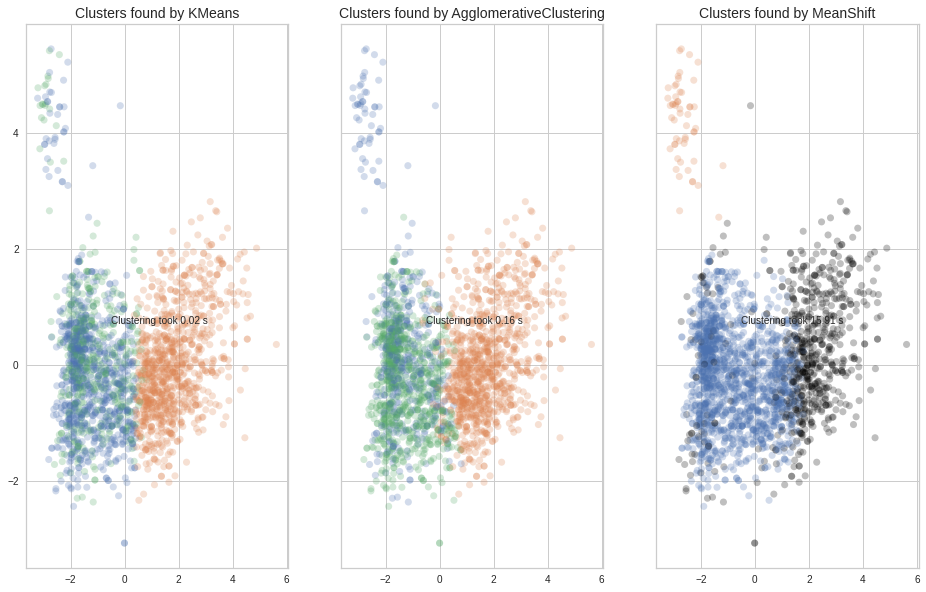

In [ ]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)

        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=df_pca,algorithms=clustering_methods,args=data_arg,kwds=clustering_para,axs=axs)

Silhouette calculates how well each point is correctly clustered for all clustering models on average.
It measures the degree of similarity (cohesion) of the points within the same cluster compared to the degree of dissimilarity (separation) from points in other clusters.
A higher Silhouette score indicates that data points are well clustered and have a greater similarity to their own cluster compared to other clusters.
Conversely, a lower Silhouette score suggests that data points may be assigned to the wrong clusters or that clusters overlap.

In [ ]:
X = df_pca

for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

Silhouette score for KMeans: 0.281
Silhouette score for AgglomerativeClustering: 0.276
Silhouette score for MeanShift: 0.274


In [ ]:
df=df.dropna()

In [ ]:
df['Clusters'] =clusters_series[0]
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=df['Clusters'],colorscale='Viridis',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of KMeans model clusters",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

In the context of K-means clustering, it's important to avoid cluster overfitting. There may be some errors or data preprocessing issues when selecting the value of K (the number of clusters) during data analysis. I attempted several values for K, but all of them produce similar results. Among them, 6, which was chosen using the Elbow method, stands out.

In [ ]:
df['Clusters'].value_counts()

1    901
0    869
2    466
Name: Clusters, dtype: int64

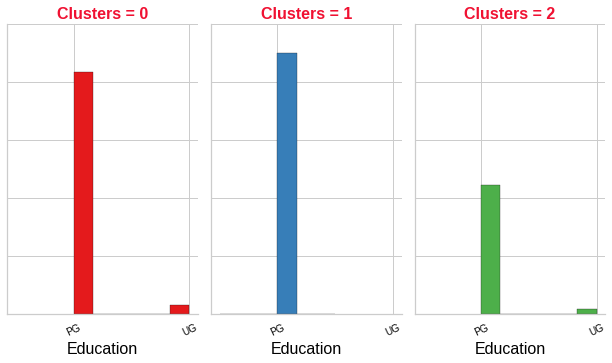

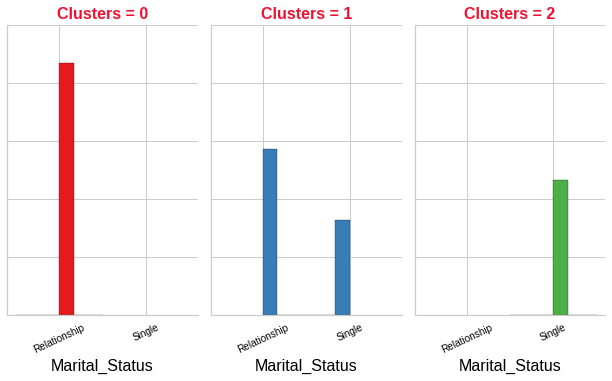

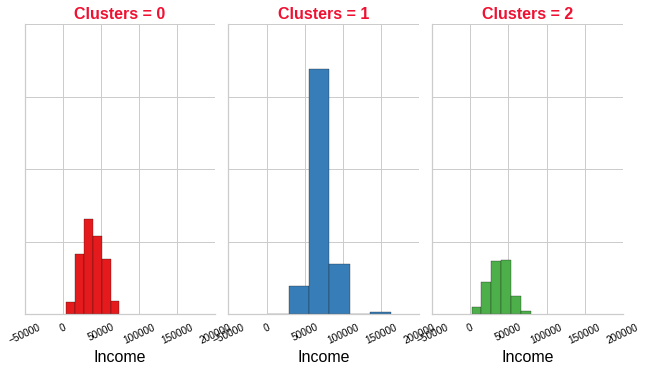

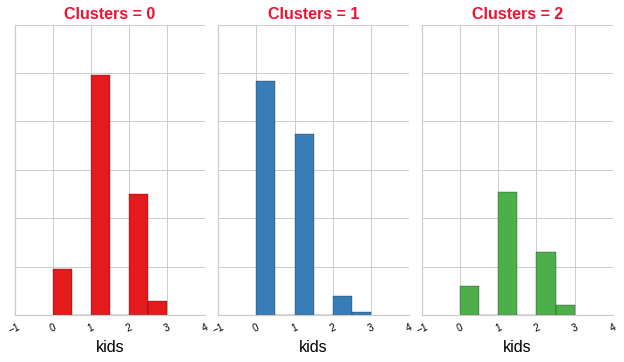

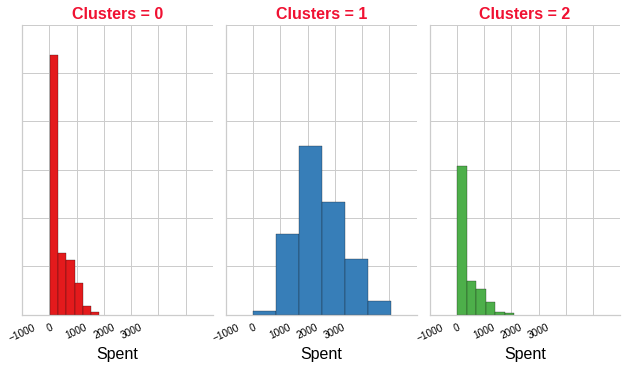

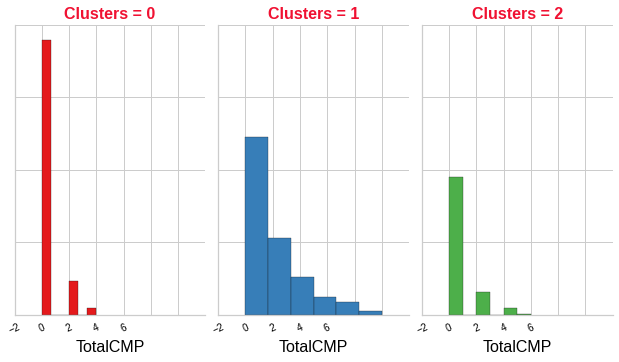

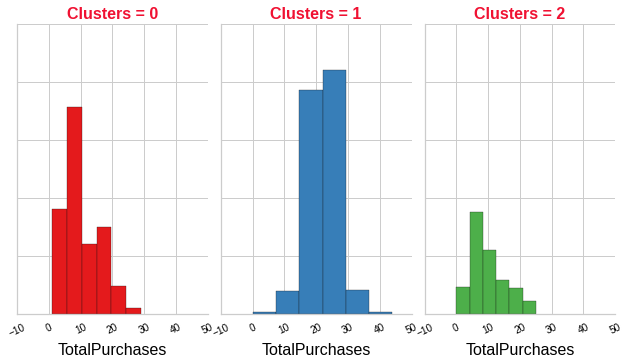

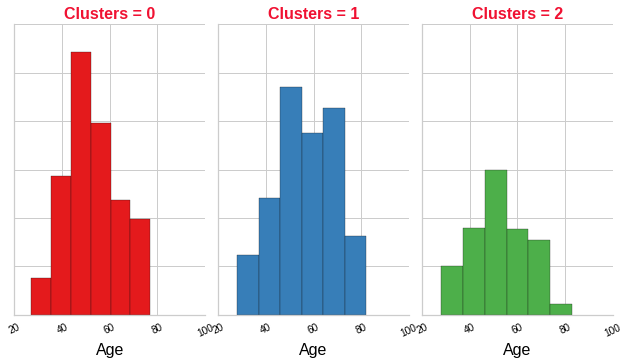

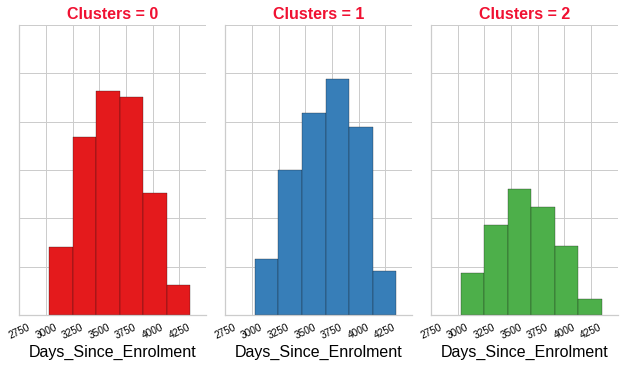

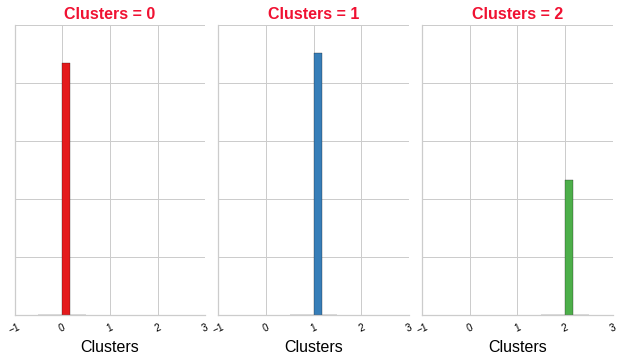

In [ ]:
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "Clusters", hue = "Clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=16, color = 'black')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

## Cluster Analysis

### Cluster 0 Users:

- **Education:** Have a very high proportion of postgraduate degrees.
- **Marital Status:** Mostly single and have no partners.
- **Income:** Have an average income of 0-50,000.
- **Number of Children:** Have 0-3 kids, with most having no children.
- **Average Spending:** Spend approximately 1,000 or less on average.
- **Campaign Participation:** Do not actively participate in the campaigns.
- **Average Purchases:** Make 7-10 purchases on average.
- **Age:** Have an average age of 45-50.

### Cluster 1 Users:

- **Education:** Have mostly completed their courses.
- **Marital Status:** Have a higher degree of partnership compared to Cluster 0 but are still relatively independent.
- **Income:** Have an average income of 70-75.
- **Number of Children:** Have fewer children, typically 0-1 child, and a minority have 2-3 children.
- **Average Spending:** Spend around 2-2.5 on average.
- **Campaign Participation:** Do not actively participate in the campaigns.
- **Average Purchases:** Make a significant number of purchases, with an average of 6 or more companies where they have participated.
- **Age:** Have an average age of 50-55.

### Cluster 2 Users:

- **Education:** Have a large proportion of users who have completed their courses, but some are still in progress.
- **Marital Status:** Are mostly independent.
- **Income:** Have an average income of 45-50.
- **Number of Children:** Have more children, with 1 child being common. Very few have 2 or more children.
- **Average Spending:** Spend less than 300 on average on products.
- **Campaign Participation:** A significant portion does not actively participate in the campaigns.
- **Average Purchases:** Make 5-10 purchases on average.
- **Age:** Have an average age of 50.

These clusters help you categorize users based on various characteristics and behaviors.
